## Context
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.



# Importing the required Libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [4]:
df= pd.read_csv('Data\data.csv')
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null int64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null int64
Policy_Sales_Channel    381109 non-null int64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
df.shape

(381109, 12)

## checking for missing data

In [8]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* No Missing data 

# Exploratory Data Analysis

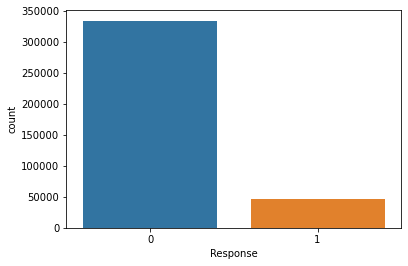

In [9]:
# Target variable count
sns.countplot(df.Response)

* The response is baised towards 0
* Over sampling can be used to balance the data

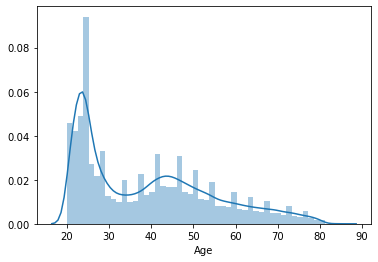

In [10]:
# Age distribution of the Customers
sns.distplot(df.Age)

* majority of the customers fall between the age of 20-30
* As the age increases the customers count decreases

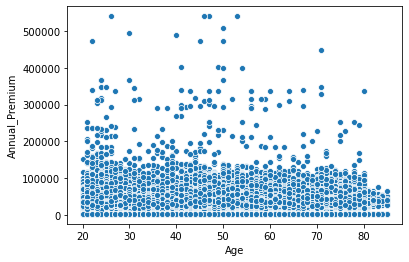

In [11]:
# scatter plot between Age and Annua_Premium
sns.scatterplot(x=df['Age'],y=df['Annual_Premium'])

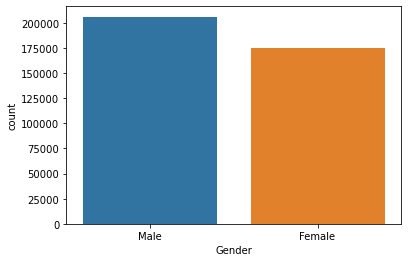

In [12]:
# count of Male and Female
sns.countplot(df.Gender)

* The gender is balanced between Male and Female

## Correlation Matrix

Correlation matrix-


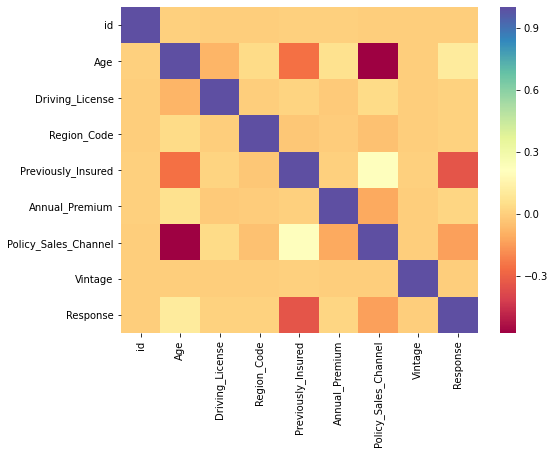

In [13]:
print("Correlation matrix-")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='Spectral');

## Vehicle damage

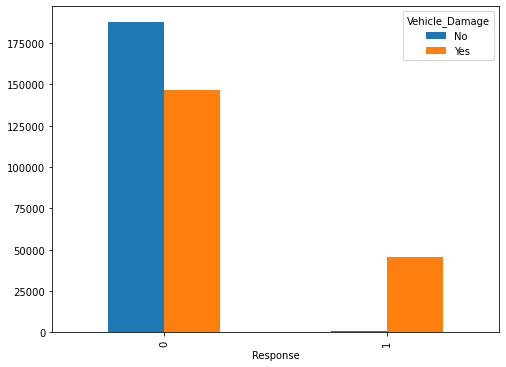

In [14]:
pd.crosstab(df['Response'], df['Vehicle_Damage']).plot(kind='bar');

## Handling the categorical values and Encoding

In [15]:
 
df.loc[df['Gender'] == 'Male', 'Gender'] = 1
df.loc[df['Gender'] == 'Female', 'Gender'] = 0

df.loc[df['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
df.loc[df['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
df.loc[df['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0


df.loc[df['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
df.loc[df['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,1,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,0,0,28619,152,203,0
4,5,0,29,1,41,1,0,0,27496,152,39,0


## converting the float values to integer

In [16]:
for col in df.columns:
    df[col] = df[col].astype(np.int32)

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,1,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,0,0,28619,152,203,0
4,5,0,29,1,41,1,0,0,27496,152,39,0


## Checking the Correlation

In [17]:

for col in df.columns:
    if col == 'Response':
        continue
    print(col, df[col].corr(df['Response']))

id -0.0013681501902185302
Gender 0.052439913771341946
Age 0.11114689471250962
Driving_License 0.010155174594073915
Region_Code 0.0105698556152231
Previously_Insured -0.34117046261352274
Vehicle_Age 0.22187398721799104
Vehicle_Damage 0.3543995438797558
Annual_Premium 0.02257469554255991
Policy_Sales_Channel -0.13904150082916056
Vintage -0.0010503720019898848


In [18]:
df = df.drop(['Region_Code', 'Vintage', 'Driving_License','id'], axis=1)
df.columns

Index(['Gender', 'Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Response'],
      dtype='object')

# Model Buildling

In [19]:
X = df.drop(['Response'], axis=1)
y = df['Response']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


# Oversampling

In [21]:
# it is Imbalanced classification problem so i am doing oversampleing here
# Oversampling — Duplicating samples from the minority class
# Undersampling — Deleting samples from the majority class

In [22]:
df = pd.concat([X_train,y_train],axis=1)

from sklearn.utils import resample,shuffle
df_majority = df[df['Response']==0]
df_minority = df[df['Response']==1]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=y_train.value_counts()[0],random_state = 123)
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.Response.value_counts()

1    267585
0    267585
Name: Response, dtype: int64

In [23]:
X_new = balanced_df.drop(['Response'], axis=1)
y_new = balanced_df['Response']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=666)

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression(random_state=666)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred,))
accuracy_score(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.92      0.61      0.73     53691
           1       0.71      0.95      0.81     53343

    accuracy                           0.78    107034
   macro avg       0.81      0.78      0.77    107034
weighted avg       0.81      0.78      0.77    107034



0.7778930059607227

-

## XGBoost Classifier

In [26]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import classification_report



xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred,))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.68      0.78     53691
           1       0.74      0.93      0.83     53343

    accuracy                           0.80    107034
   macro avg       0.82      0.80      0.80    107034
weighted avg       0.82      0.80      0.80    107034



0.8033335201898462

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     53691
           1       0.87      0.98      0.92     53343

    accuracy                           0.92    107034
   macro avg       0.92      0.92      0.92    107034
weighted avg       0.92      0.92      0.92    107034



0.9156529700842723

## saving the model

In [28]:
import pickle
filename = 'Model/model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
pip freeze > requirements.txt